# Compare the analytical solution and the neural net mask

In [2]:
%load_ext autoreload
%autoreload 2

In [21]:
import sys
sys.path.append("..")
from utils.model3 import Net_mask
from utils.data import Data
from scripts.parameters import get_parameters, get_parameters_2
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.distributions.multivariate_normal import MultivariateNormal

In [22]:
model1 = Net_mask()
model2 = Net_mask()
model3 = Net_mask()
data = Data
run = 0
outer_folder = 'combined'
#outer_folder_2 = 'map_numpy'
#outer_folder_2 = 'map_1000'
name1 = '../saved_models/' + str(outer_folder) + '/map/' + str(run) + '/model_weights.pth'
name2 = '../saved_models/' + str(outer_folder) + '/pos/' + str(run) + '/model_weights.pth'
name3 = '../saved_models/' + str(outer_folder) + '/neg/' + str(run) + '/model_weights.pth'
model1.load_state_dict(torch.load(name1))
model2.load_state_dict(torch.load(name2))
model3.load_state_dict(torch.load(name3))
model1.eval()
model2.eval()
model3.eval()

Net_mask(
  (layers): Sequential(
    (0): Linear(in_features=20, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=10, bias=True)
  )
)

In [23]:
tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps, tensor_Q_m, sigma2_eps, tau2 = get_parameters()
data = Data(tensor_mu_m, tensor_Sigma_m, tensor_mu_eps, tensor_Sigma_eps)

In [24]:
tensor_data = data.get_tensor_data(1)
post, _ = data.get_tensor_posterior(tensor_data[0])
out_raw1 = model1(tensor_data)
out_raw2 = model2(tensor_data)
out_raw3 = model3(tensor_data)
out1 = out_raw1[0].detach().numpy()
out2 = out_raw2[0].detach().numpy()
out3 = out_raw2[0].detach().numpy()
d = tensor_data[0][:10]
mask = tensor_data[0][10:]
location_raw = torch.where(mask > 0.5)
location = location_raw[0]
points = tensor_data[0][location_raw]

tensor([[-0.0000, -0.6050, -0.0000,  0.0000,  0.0000, -0.0000, -0.9097, -0.0000,
          0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  0.0000]])
tensor([1, 6])
tensor([-0.6050, -0.9097])


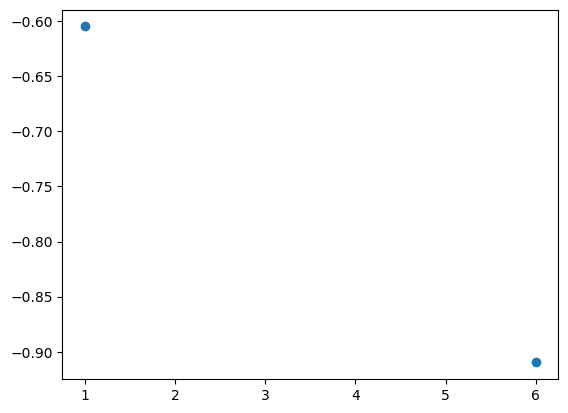

In [19]:
print(tensor_data)
print(location_raw[0])
print(tensor_data[0][location_raw])
#plt.plot(location_raw[0].detach().numpy(), tensor_data[0][location_raw].detach().numpy(), 'o')
plt.plot(location_raw[0], tensor_data[0][location_raw], 'o')

(0.0, 10.0, -3.0, 3.0)

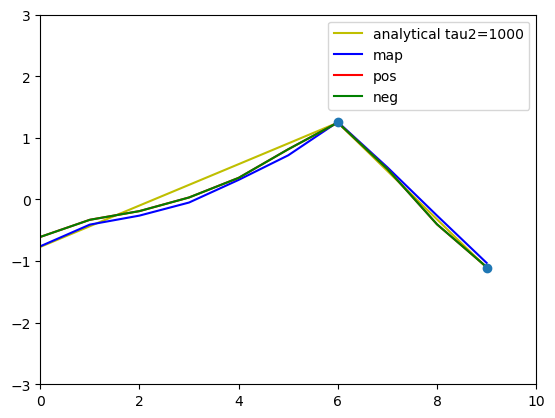

In [25]:
plt.plot(range(10), post, 'y')
plt.plot(range(10), out1, 'b')
plt.plot(range(10), out2, 'r')
plt.plot(range(10), out3, 'g')
plt.plot(location, points, 'o')
plt.legend(['analytical tau2=1000', 'map', 'pos', 'neg'])
plt.axis([0,10,-3,3])

In [16]:
from utils.loss3 import Loss
loss = Loss()
import utils.loss3 as l3
l3l = l3.Loss()
tensor_data = tensor_data.type(torch.DoubleTensor)
post = post.type(torch.DoubleTensor)
out_raw = out_raw.type(torch.DoubleTensor)
out_raw2 = out_raw2.type(torch.DoubleTensor)
loss1 = loss.loss(tensor_data, torch.unsqueeze(post, 0), 'm', 'c', 'i') 
loss2 = loss.loss(tensor_data, out_raw, 'm', 'c', 'i') 
loss3 = loss.loss(tensor_data, out_raw2, 'm', 'c', 'i') 
l3value = l3l.loss(tensor_data, torch.unsqueeze(post, 0), 'm', 'c', 'i')
print(loss1[0])
print(loss2[0])
print(loss3[0])
print(l3value[0])

tensor(0.1289, dtype=torch.float64)
tensor(0.2103, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.2247, dtype=torch.float64, grad_fn=<AddBackward0>)
tensor(0.1289, dtype=torch.float64)
